In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('BMW_Car_Sales_Classification.csv')

### Explore data

In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

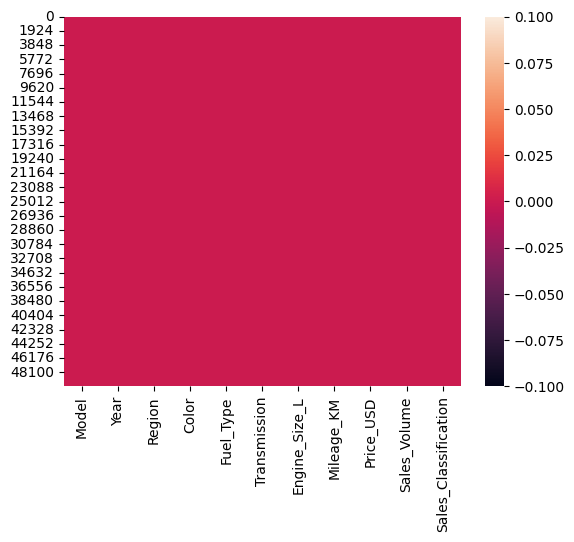

In [7]:
sns.heatmap(df.isna())
plt.show()

### feature engineering to add column Total price Because the price_USD is for one car only

In [8]:
df['Total price']=df['Price_USD']*df['Sales_Volume']

In [9]:
df.sample(5)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Total price
11969,5 Series,2016,Europe,Grey,Hybrid,Automatic,2.5,82613,64936,1810,Low,117534160
32116,X6,2014,Africa,Black,Electric,Automatic,2.7,136054,105845,6656,Low,704504320
36683,7 Series,2017,Asia,Grey,Hybrid,Automatic,5.0,142681,44839,3208,Low,143843512
45217,X5,2024,Middle East,Blue,Diesel,Automatic,2.6,143834,117626,8007,High,941831382
40343,5 Series,2020,Africa,Red,Electric,Automatic,3.2,152484,105927,6497,Low,688207719


In [10]:
categorical_data=df.select_dtypes(include='object')
numerical_data=df.select_dtypes(exclude='object')

### univarate analysis to categorical data

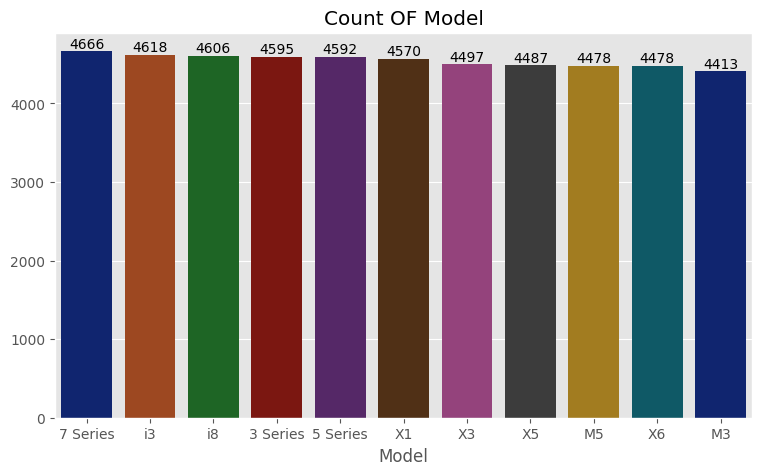

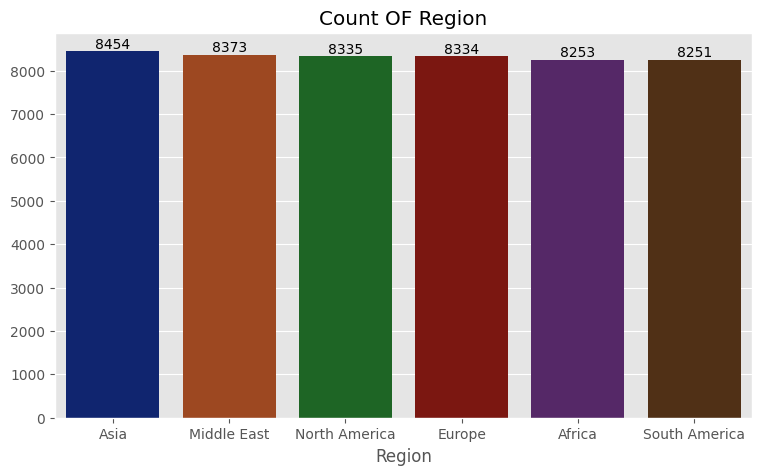

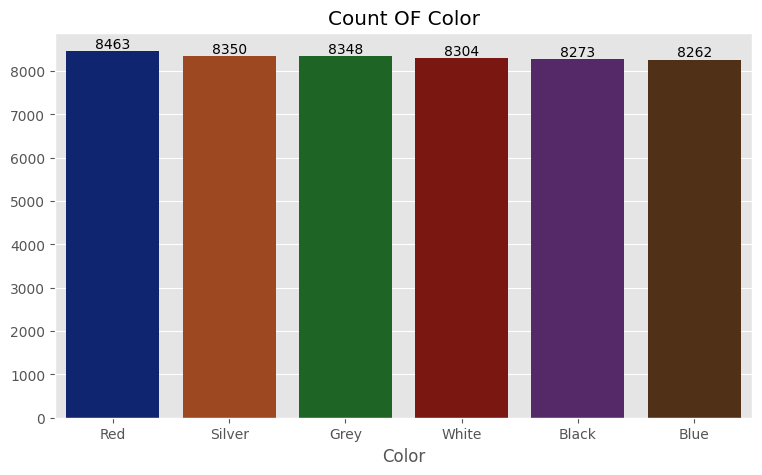

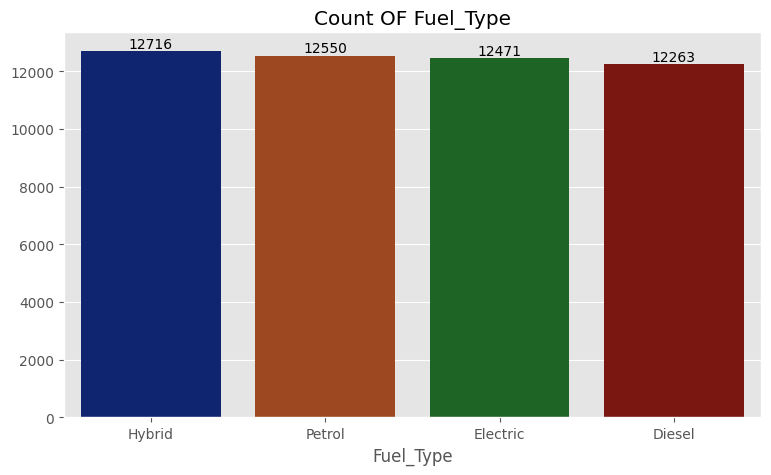

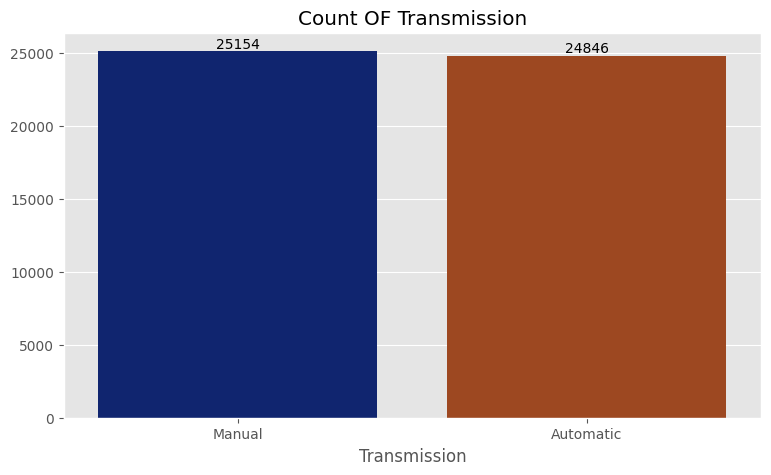

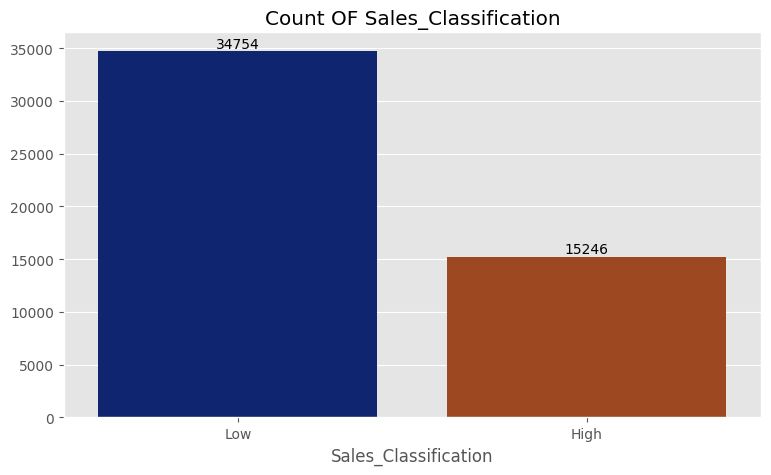

In [11]:
plt.style.use('ggplot')
for cat in categorical_data:
    plt.figure(figsize=(9,5))
    val=categorical_data[cat].value_counts()
    sns.barplot(x=val.index,y=val.values,palette='dark')
    plt.title(f'Count OF {cat}')
    for index,value in enumerate (val.values):
        plt.text(index,value, str(value),va='bottom',ha='center')


### Distribution the numerical data

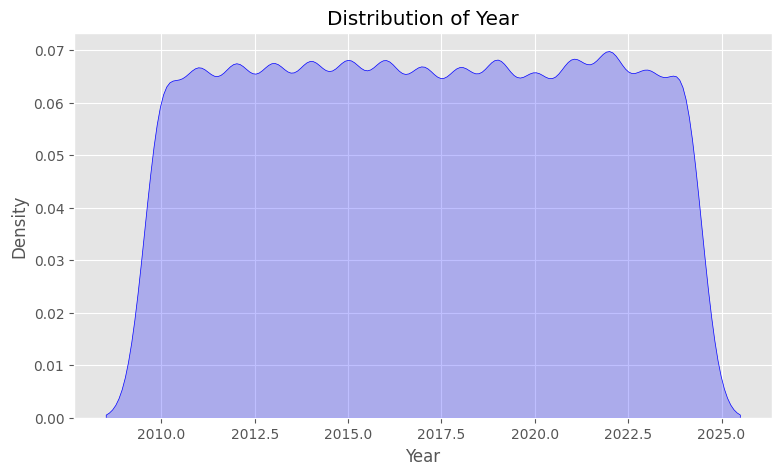

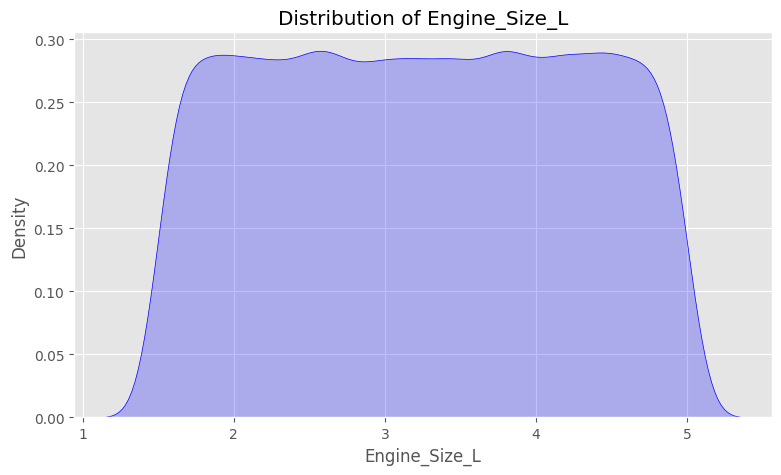

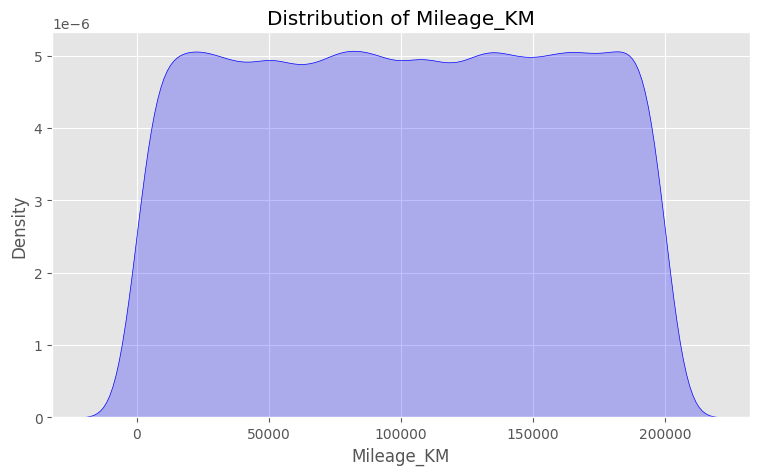

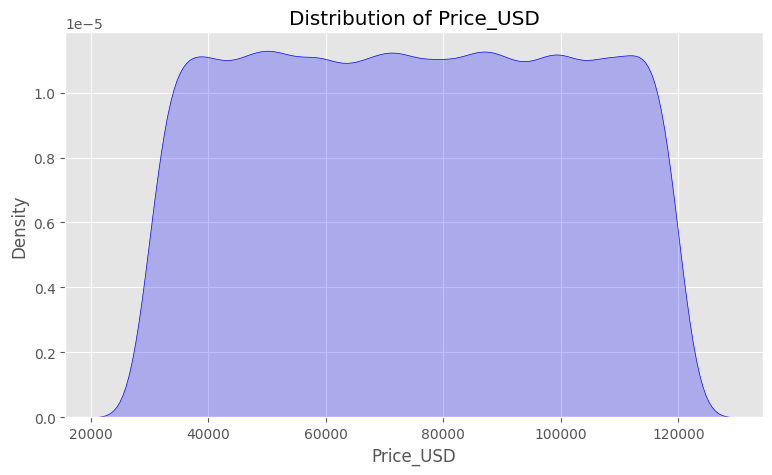

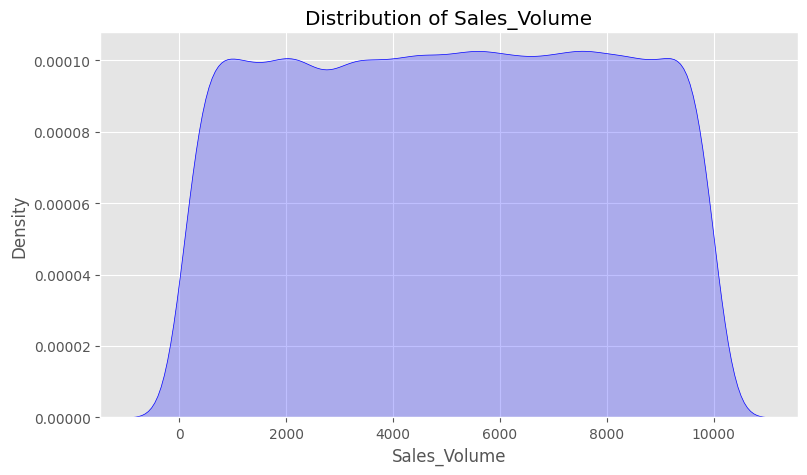

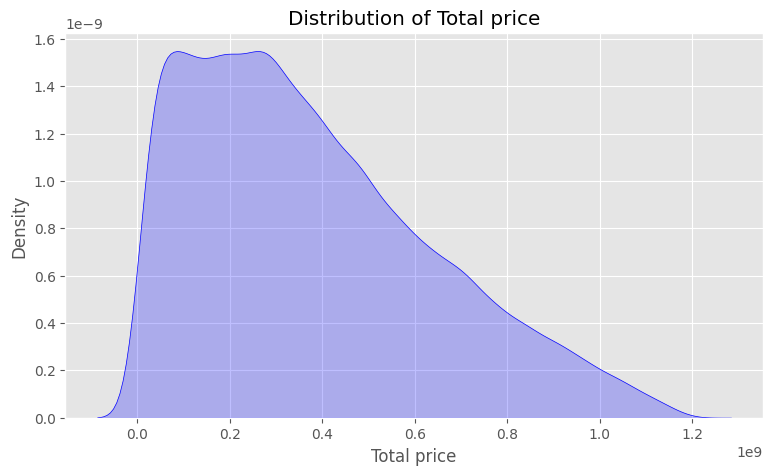

In [12]:
for i in numerical_data:
    plt.figure(figsize=(9,5))
    plt.title(f'Distribution of {i}')
    sns.kdeplot(numerical_data[i],fill=True,color='b')

    

### Distribution data and outliers using boxplot

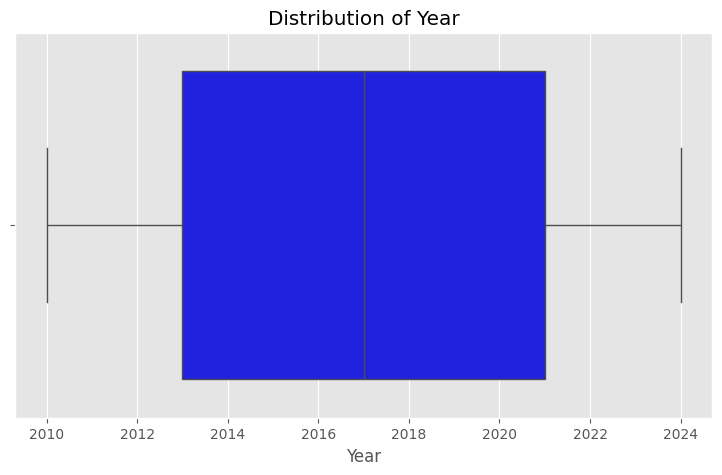

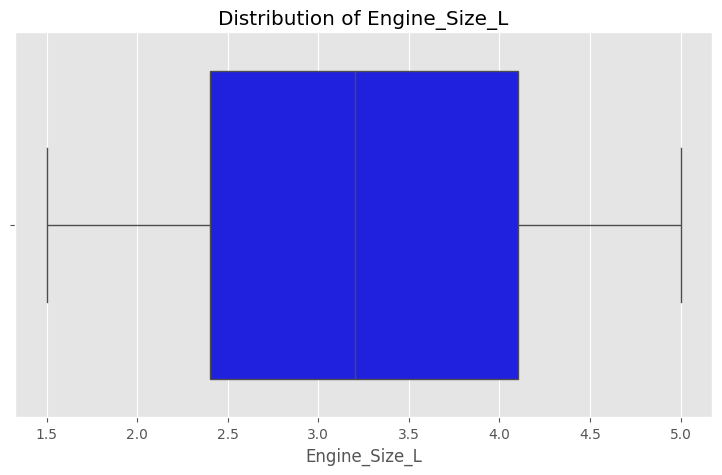

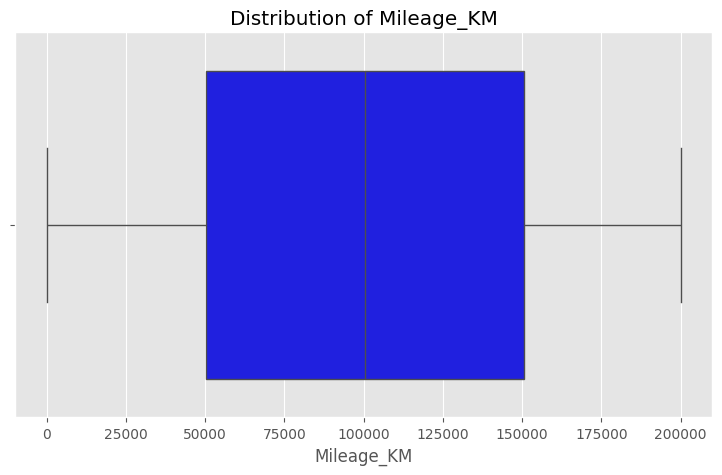

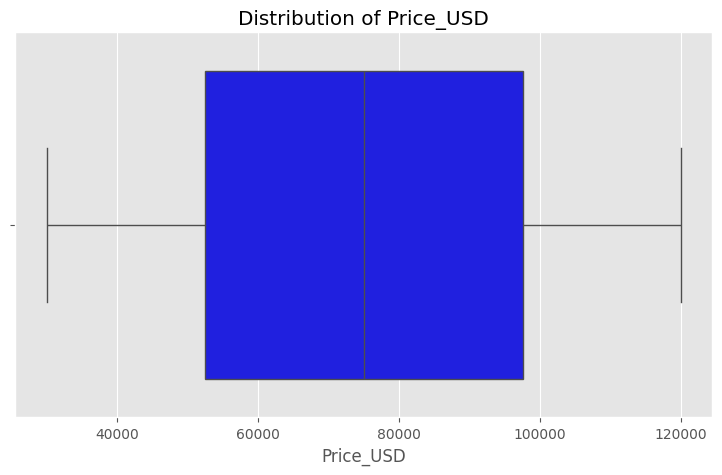

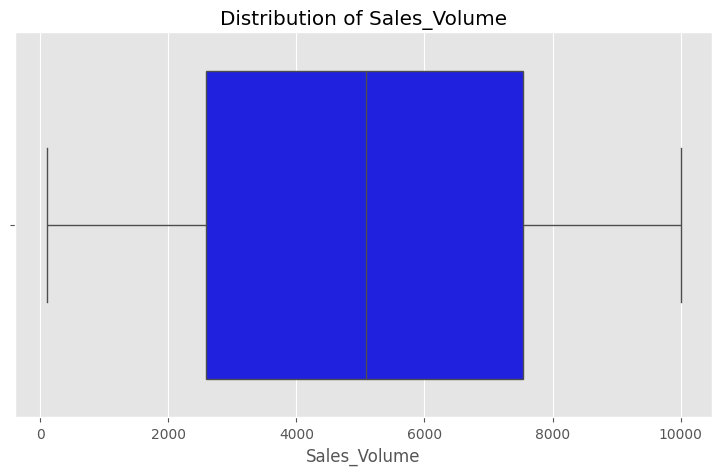

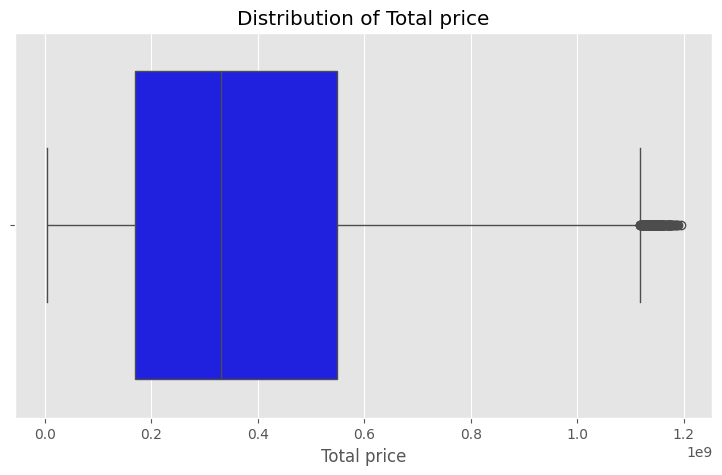

In [13]:
for i in numerical_data:
    plt.figure(figsize=(9,5))
    plt.title(f'Distribution of {i}')
    sns.boxplot(numerical_data[i],color='b',orient='h')


In [14]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Total price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680,3.802449e+08
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125,2.623406e+08
min,2010.000000,1.500000,3.000000,30000.000000,100.000000,3.410472e+06
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000,1.689871e+08
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000,3.318010e+08
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000,5.486494e+08
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000,1.194346e+09


### calculate outliers with maths

In [15]:
values = ['Price_USD', 'Sales_Volume','Total price']

for i in values:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]

    if outliers.empty:
        print(f'✅ No outliers found in {i}')
    else:
        print(f'⚠️ Found {len(outliers)} outliers in {i}')
        print(outliers[i].head())  


✅ No outliers found in Price_USD
✅ No outliers found in Sales_Volume
⚠️ Found 167 outliers in Total price
154    1154361520
238    1124709120
277    1151740800
726    1133161246
938    1155274407
Name: Total price, dtype: int64


### Analysis each categorical data column with Total Price

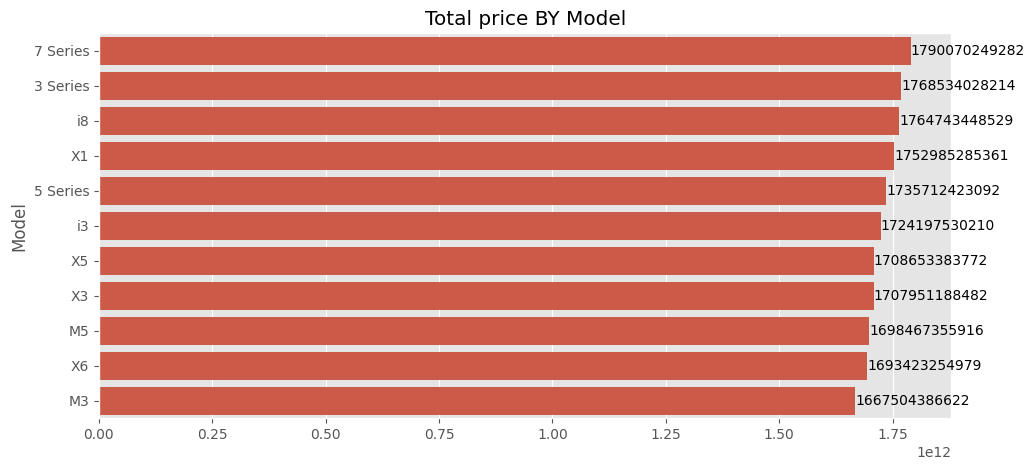

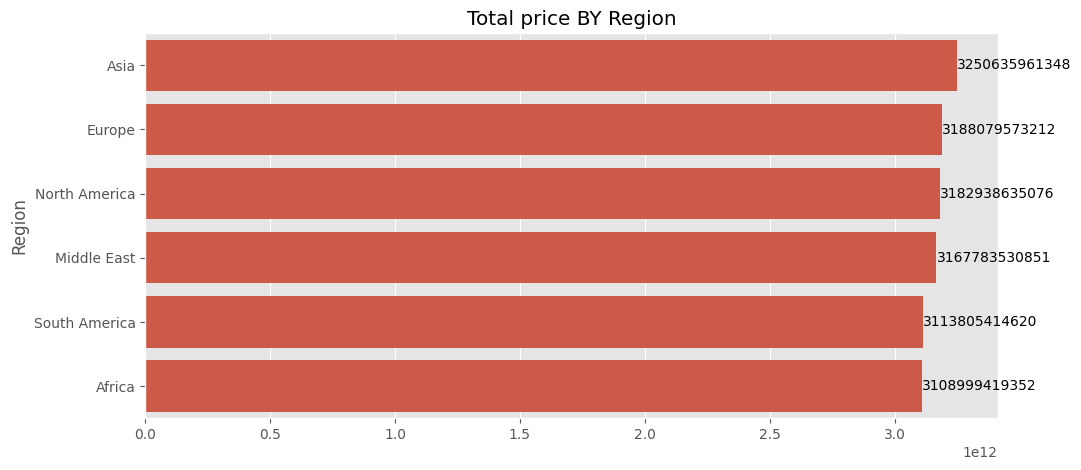

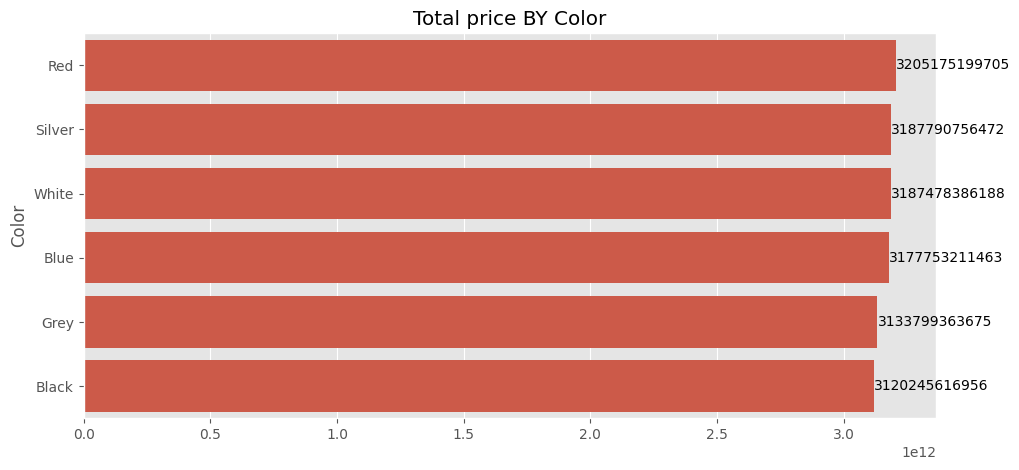

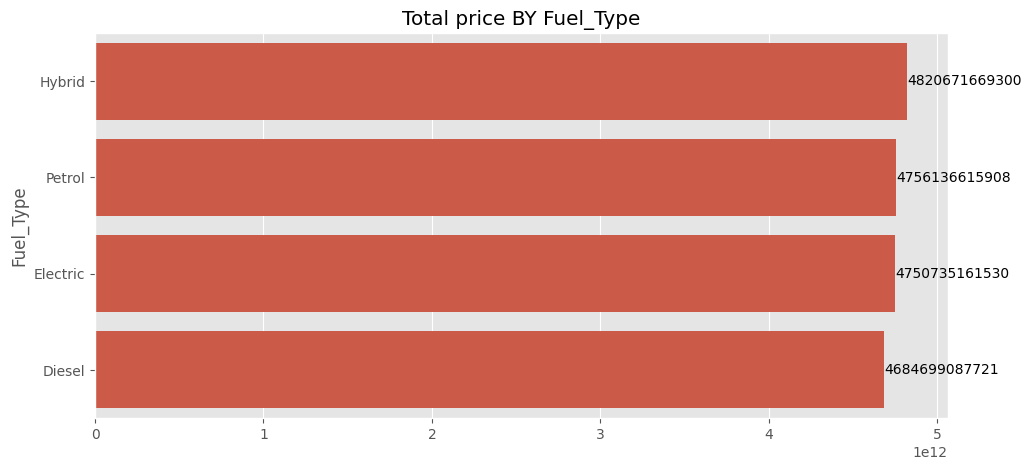

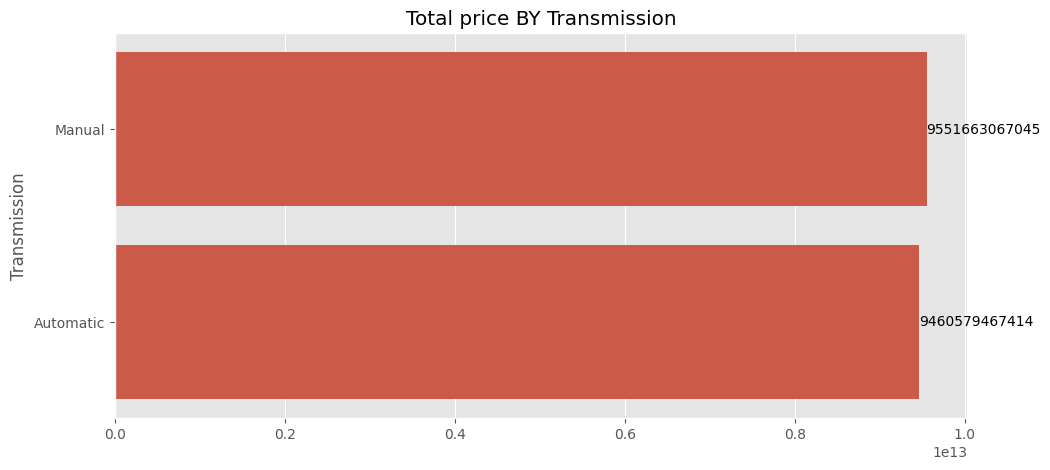

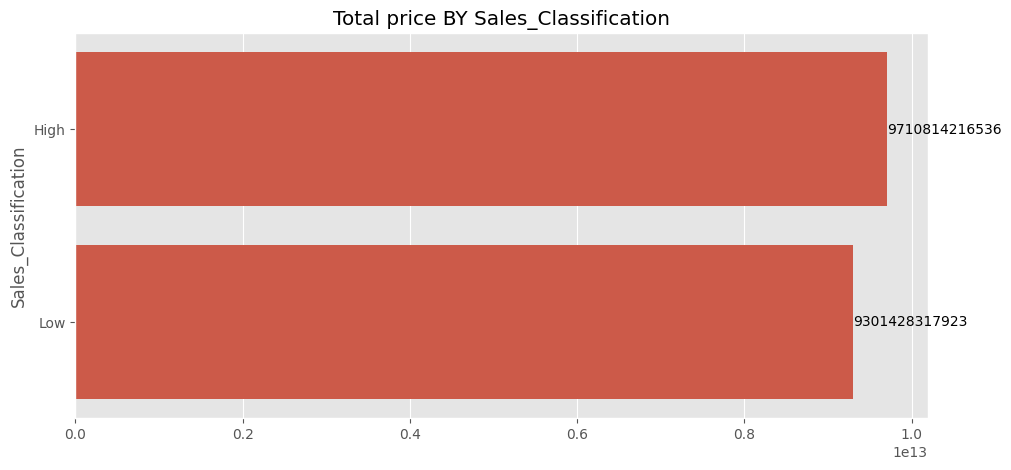

In [16]:
for i in categorical_data:
    group=df.groupby(i)['Total price'].sum().sort_values(ascending=False)
    plt.figure(figsize=(11,5))
    sns.barplot(x=group.values,y=group.index)
    plt.title(f'Total price BY {i}')
    for index,value in enumerate(group.values):
        plt.text(value,index,str(value),va='center',ha='left')


### Total Price BY Year

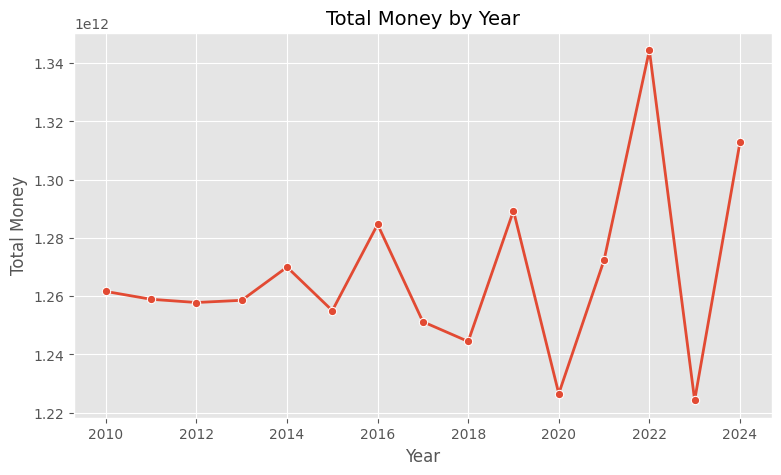

In [17]:
grouped = df.groupby('Year')['Total price'].sum().reset_index()

plt.figure(figsize=(9,5))
sns.lineplot(data=grouped, x='Year', y='Total price', marker='o', linewidth=2)

plt.title('Total Money by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Money', fontsize=12)
plt.grid(True)
plt.show()

### Sales_Volume BY Sales_Classification

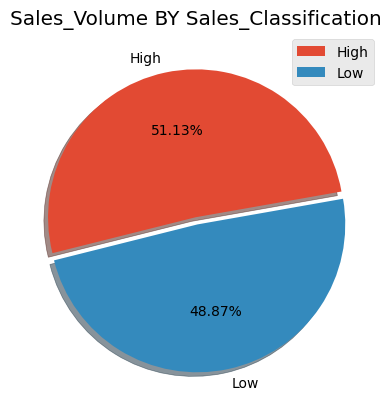

Sales_Classification
High    129552829
Low     123822905
Name: Sales_Volume, dtype: int64

In [18]:
grouped = df.groupby('Sales_Classification')['Sales_Volume'].sum()
plt.pie(grouped.values,labels=group.index,autopct='%0.2f%%',shadow=True,explode=[0,0.05],startangle=10)
plt.title('Sales_Volume BY Sales_Classification')
plt.legend()
plt.show()
grouped

### Analysis of the car Model with each Categorical data columns BY Total Price

In [19]:
from IPython.display import display

names = ['Region','Color','Fuel_Type','Transmission']

for i in names:
    d = pd.crosstab(df['Model'], df[i], values=df['Total price'], aggfunc='sum')
    d = d.round(2)
    print(f"\n===== Crosstab: Total Price by Model and {i} =====")
    display(d)  



===== Crosstab: Total Price by Model and Region =====


Region,Africa,Asia,Europe,Middle East,North America,South America
Model,,,,,,
3 Series,300107613560,302685161456,304196796025,290908487374,293393083439,277242886360
5 Series,306136833319,291989135417,291699397601,280945142628,277904288187,287037625940
7 Series,278348653945,304097565188,289881216749,308396604258,314780958629,294565250513
M3,258541547778,304012053648,268197539500,286043954398,280000086195,270709205103
M5,258741136182,294331241200,294088330593,298808451044,271793167777,280705029120
X1,293896438138,310980489459,283759876726,293197921768,297675825616,273474733654
X3,282921559306,292717213333,275829016944,274480967078,297604844802,284397587019
X5,294225469155,279670600883,283787379840,295680139025,281098244721,274191550148
X6,278066184849,284615674622,279585786666,279154300922,275637524484,296363783436



===== Crosstab: Total Price by Model and Color =====


Color,Black,Blue,Grey,Red,Silver,White
Model,,,,,,
3 Series,268474360949,319887211707,271936254563,300738478710,324555907932,282941814353
5 Series,283021541935,279658821267,287661706093,285229502160,292557770916,307583080721
7 Series,299949198563,271710262640,307414311041,305597521212,309753114500,295645841326
M3,264395289815,283971231659,275528073692,296325042091,270614894270,276669855095
M5,268560358339,280763904448,272054445538,279127513267,291762835674,306198298650
X1,287682944661,287750005600,275340951552,302563644607,311443774377,288203964564
X3,282228748708,283333805918,283482260759,282681038509,292471296083,283754038505
X5,302450002684,290945032296,278948034930,284366915132,259357709373,292585689357
X6,279996518572,295631427458,303435191632,279879808808,246114395671,288365912838



===== Crosstab: Total Price by Model and Fuel_Type =====


Fuel_Type,Diesel,Electric,Hybrid,Petrol
Model,,,,
3 Series,441338593005,444189100836,460743740565,422262593808
5 Series,420633573636,435159935386,433238332207,446680581863
7 Series,451901727935,435310711957,463680156415,439177652975
M3,399073236050,428984177856,427694128853,411752843863
M5,397021471922,428130643481,444516219799,428799020714
X1,427715786403,454394918510,441214623606,429659956842
X3,423415307381,430569414802,436157855089,417808611210
X5,432430982580,433234599344,411136175914,431851625934
X6,415960342388,407333828846,428566182774,441562900971



===== Crosstab: Total Price by Model and Transmission =====


Transmission,Automatic,Manual
Model,,
3 Series,883517260022,885016768192
5 Series,874195612911,861516810181
7 Series,888115661528,901954587754
M3,835482073289,832022313333
M5,819262315284,879205040632
X1,882921197377,870064087984
X3,847597881493,860353306989
X5,851057520351,857595863421
X6,837392499125,856030755854


### ML Model

In [20]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Total price
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


In [21]:
data=df.copy()

In [22]:
data.drop(['Sales_Volume','Total price'],axis=1,inplace=True)


### SKlearn library

In [23]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Encodeing

In [24]:
le=LabelEncoder()
data['Model']=le.fit_transform(data['Model'])
data['Region']=le.fit_transform(data['Region'])
data['Color']=le.fit_transform(data['Color'])
data['Fuel_Type']=le.fit_transform(data['Fuel_Type'])
data['Transmission']=le.fit_transform(data['Transmission'])
data['Sales_Classification']=le.fit_transform(data['Sales_Classification'])

In [25]:
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Classification
0,1,2016,1,3,3,1,3.5,151748,98740,0
1,10,2013,4,3,2,0,1.6,121671,79219,1
2,1,2022,4,1,3,0,4.5,10991,113265,1
3,6,2024,3,1,3,0,1.7,27255,60971,1
4,2,2020,5,0,0,1,2.1,122131,49898,1


In [26]:
data.shape

(50000, 10)

In [27]:
x=data.drop( 'Sales_Classification',axis=1)
y=data['Sales_Classification']

In [28]:
scale=StandardScaler()
X=scale.fit_transform(x)

### cross valdation to evaluation the model 

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [30]:
model_svm= SVC()
model_svm.fit(x_train,y_train)                 

SVC()

In [31]:
model_dt= DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
model_rf= RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
y_pred_svm=model_svm.predict(x_test)
y_pred_dt=model_dt.predict(x_test)
y_pred_rf=model_rf.predict(x_test)

### Model Accuracy Measurement

In [34]:
accuracy=accuracy_score(y_test,y_pred_svm)*100
print(f'Test Accuracy={accuracy} %')

train_accuracy = model_svm.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Test Accuracy=69.67999999999999 %
Training Accuracy: 69.47%


In [35]:
accuracy=accuracy_score(y_test,y_pred_dt)*100
print(f'Test Accuracy={accuracy} %')

train_accuracy = model_dt.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Test Accuracy=57.3 %
Training Accuracy: 100.00%


In [36]:
accuracy=accuracy_score(y_test,y_pred_rf)*100
print(f'Test Accuracy={accuracy} %')

train_accuracy = model_rf.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Test Accuracy=68.78 %
Training Accuracy: 100.00%


In [37]:
cr=classification_report(y_test,y_pred)
print(f'===========Classification Report==============\n {cr}')

NameError: name 'y_pred' is not defined

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,linewidths=0.2,fmt='1')
plt.xlabel('actual values')
plt.ylabel('prediction values')
plt.show()